In [4]:
import pandas as pd
import numpy as np
import os
from sklearn import metrics, preprocessing, linear_model
# Set seed for reproducibility
np.random.seed(0)

In [5]:
# Read the data that Ajay labeled. Convert 1,000 to 1000
from IPython.core.debugger import Tracer
training_data_path = os.path.join(os.environ['DATA_DIR'], 'numerai_training_data.csv')
prediction_data_path = os.path.join(os.environ['DATA_DIR'], 'numerai_tournament_data.csv')
print("Loading data...")
# Load the data from the CSV files
training_data = pd.read_csv(training_data_path, header=0)
prediction_data = pd.read_csv(prediction_data_path, header=0)

Loading data...


In [6]:
# Transform the loaded CSV data into numpy arrays
features = [f for f in list(training_data) if "feature" in f]
X = training_data[features]
Y = training_data["target"]
x_prediction = prediction_data[features]
ids = prediction_data["id"]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108405 entries, 0 to 108404
Data columns (total 21 columns):
feature1     108405 non-null float64
feature2     108405 non-null float64
feature3     108405 non-null float64
feature4     108405 non-null float64
feature5     108405 non-null float64
feature6     108405 non-null float64
feature7     108405 non-null float64
feature8     108405 non-null float64
feature9     108405 non-null float64
feature10    108405 non-null float64
feature11    108405 non-null float64
feature12    108405 non-null float64
feature13    108405 non-null float64
feature14    108405 non-null float64
feature15    108405 non-null float64
feature16    108405 non-null float64
feature17    108405 non-null float64
feature18    108405 non-null float64
feature19    108405 non-null float64
feature20    108405 non-null float64
feature21    108405 non-null float64
dtypes: float64(21)
memory usage: 17.4 MB


In [8]:
# This is your model that will learn to predict
model = linear_model.LogisticRegression(n_jobs=-1)

In [9]:
print("Training...")
# Your model is trained on the training_data
model.fit(X, Y)

Training...


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
print("Predicting...")
# Your trained model is now used to make predictions on the numerai_tournament_data
# The model returns two columns: [probability of 0, probability of 1]
# We are just interested in the probability that the target is 1.
y_prediction = model.predict_proba(x_prediction)
results = y_prediction[:, 1]
results_df = pd.DataFrame(data={'probability':results})
joined = pd.DataFrame(ids).join(results_df)

Predicting...


In [13]:
print("Writing predictions to predictions.csv")
# Save the predictions out to a CSV file
predictions_path = os.path.join(os.environ['FILES_DIR'], 'predictions.csv')
joined.to_csv(predictions_path, index=False)
# Now you can upload these predictions on numer.ai

Writing predictions to predictions.csv


In [93]:
from sklearn import ensemble
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
model = XGBClassifier() #tree.DecisionTreeClassifier() #XGBClassifier() #tree.DecisionTreeClassifier() #GaussianNB() #XGBClassifier() #tree.DecisionTreeClassifier() #** XGBClassifier() #** ensemble.RandomForestClassifier() #** tree.DecisionTreeClassifier()  #** XGBClassifier() #** ensemble.RandomForestClassifier()
model.fit(X_train, y_train)

#scores = cross_val_score(model, X, y, cv=5)
#print (scores.mean())

#*** Test
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

#*** Get Accuracy
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)
#print ('Train accuracy: ', train_acc)
print ('Test accuracy: ', test_acc)

('Test accuracy: ', 0.51741155850744891)


In [94]:
# save the classifier
stats = {"train accuracy": train_acc,"test accuracy":test_acc, 'label':'initial model',}

model_filename = os.path.join(os.environ['OUTPUT_DIR'],'model.dat')
pickle.dump(model, open(model_filename, 'wb'))
stats_filename = os.path.join(os.environ['OUTPUT_DIR'],'stats.json')
with open(stats_filename, 'wb') as f:
    f.write(json.dumps(stats))

In [95]:
#scores

In [96]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 42954, 1: 43770}

In [97]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 8432, 1: 13249}

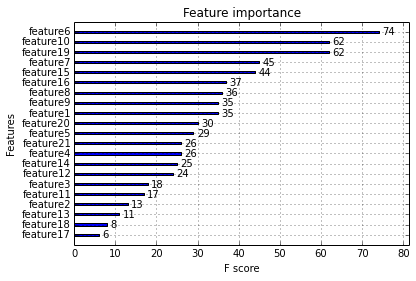

In [98]:
import xgboost as xgb
xgb.plot_importance(model)

In [99]:
# Ignore everything below for now.
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, KFold
from sklearn.grid_search import ParameterGrid
from sklearn.metrics import mean_squared_error
from IPython.core.debugger import Tracer
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 100, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params),
                            cv_params,
                             scoring = 'accuracy', cv = 5, n_jobs = -1)

In [ ]:
optimized_GBM.fit(X_train, y_train)

In [ ]:
optimized_GBM.grid_scores_

In [ ]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 5, 'min_child_weight': 5}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(X_train, y_train)

In [ ]:
optimized_GBM.grid_scores_

In [100]:
xgdmat = xgb.DMatrix(X_train, y_train) # Create our DMatrix to make XGBoost more efficient

In [101]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':5, 'min_child_weight':5} 
#'multi:softmax', 'num_class':3
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error
#metrics = ['merror']

In [73]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
0,0.445833,0.055277,0.347917,0.027638
1,0.479167,0.058926,0.317708,0.021600
2,0.433333,0.071443,0.288542,0.019654
3,0.412500,0.048233,0.275000,0.025388


In [74]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':5, 'min_child_weight':5} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

In [75]:
%matplotlib inline
#import seaborn as sns
#sns.set(font_scale = 1.5)

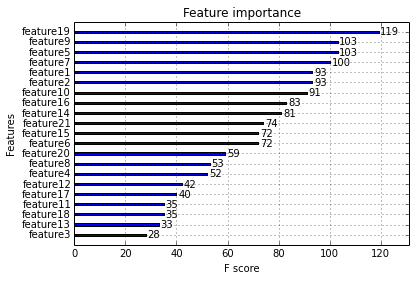

In [76]:
xgb.plot_importance(final_gb)

In [77]:
testdmat = xgb.DMatrix(X_test)

In [78]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([ 0.49522573,  0.79545021,  0.32117143,  0.72321427,  0.04955609,
        0.50808275,  0.09974863,  0.77591938,  0.27733293,  0.75389212,
        0.10806163,  0.51905006,  0.43382812,  0.68299204,  0.64787209,
        0.01254385,  0.65830249,  0.71868294,  0.34900624,  0.86035168,
        0.77770293,  0.81345093,  0.51187766,  0.88827503,  0.39089662,
        0.55561084,  0.88005376,  0.14090846,  0.59275877,  0.09557401,
        0.39433619,  0.04193287,  0.80316031,  0.60410136,  0.70798481,
        0.1609358 ,  0.51786107,  0.95871764,  0.91426307,  0.72818691,
        0.96662962,  0.49560851,  0.56286108,  0.74377596,  0.05500615,
        0.30719706,  0.65188801,  0.75556284,  0.18659678,  0.9350931 ,
        0.90472507,  0.31887615,  0.85654539,  0.03447091,  0.10486865,
        0.78949392,  0.01681714,  0.67558688,  0.89529043,  0.42932796], dtype=float32)

In [79]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.], dtype=float32)

In [80]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.55000000000000004, 0.44999999999999996)

In [81]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0.0: 24, 1.0: 36}

In [82]:
test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)

In [83]:
# save the classifier
stats = {"train accuracy": train_acc,"test accuracy":test_acc, 'label':'final model with specific params',}

model_filename = os.path.join(os.environ['OUTPUT_DIR'],'model.dat')
pickle.dump(final_gb, open(model_filename, 'wb'))
stats_filename = os.path.join(os.environ['OUTPUT_DIR'],'stats.json')
with open(stats_filename, 'wb') as f:
    f.write(json.dumps(stats))